In [32]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [33]:
file_list = glob("./data/*.csv")
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\schema.csv']

In [34]:
mca = pd.read_csv(file_list[2], encoding="cp437", low_memory=False)
mca.shape

(16716, 228)

In [35]:
pd.set_option("display.max_colwidth", None)

In [38]:
mca["BlogsPodcastsNewslettersSelect"].head()

0    Becoming a Data Scientist Podcast,Data Machina Newsletter,O'Reilly Data Newsletter,Partially Derivative Podcast,R Bloggers Blog Aggregator
1                                                                                 Becoming a Data Scientist Podcast,Siraj Raval YouTube Channel
2                                                                                       FastML Blog,No Free Hunch Blog,Talking Machines Podcast
3                                                                                                                                KDnuggets Blog
4                                                                  Data Machina Newsletter,Jack's Import AI Newsletter,O'Reilly Data Newsletter
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [54]:
pd.reset_option("display.max_colwidth")

In [55]:
media_series = mca["BlogsPodcastsNewslettersSelect"].str.split(",", expand=True).stack().reset_index(level=1, drop=True)
media_series.shape

(18218,)

In [44]:
media_count_series = media_series.value_counts().head(20)
media_count_series

KDnuggets Blog                                       2650
R Bloggers Blog Aggregator                           2046
O'Reilly Data Newsletter                             1604
Becoming a Data Scientist Podcast                    1299
Other (Separate different answers with semicolon)    1296
No Free Hunch Blog                                   1238
Siraj Raval YouTube Channel                          1040
FastML Blog                                           729
Statistical Modeling                                  662
 and Social Science Blog (Andrew Gelman)              662
 Causal Inference                                     662
Data Machina Newsletter                               660
The Data Skeptic Podcast                              567
Talking Machines Podcast                              473
Data Elixir Newsletter                                447
FlowingData Blog                                      392
Linear Digressions Podcast                            369
Data Stories P

In [63]:
sns.set(font_scale=0.8, font="Malgun Gothic")

<Axes: >

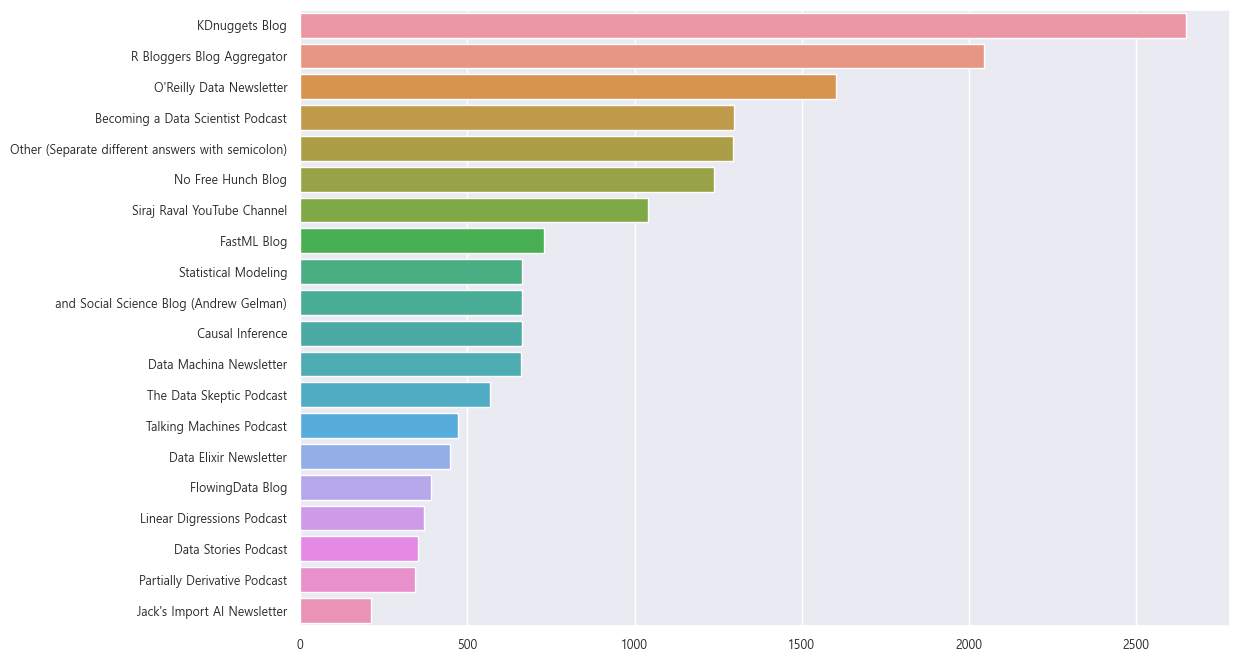

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(y=media_count_series.index, x=media_count_series.values)

In [58]:
media_origin_series = mca["BlogsPodcastsNewslettersSelect"].value_counts().head(20)
media_origin_series

Other (Separate different answers with semicolon)                                              608
KDnuggets Blog                                                                                 498
R Bloggers Blog Aggregator                                                                     414
O'Reilly Data Newsletter                                                                       234
Becoming a Data Scientist Podcast                                                              223
No Free Hunch Blog                                                                             208
KDnuggets Blog,R Bloggers Blog Aggregator                                                      204
Siraj Raval YouTube Channel                                                                    199
KDnuggets Blog,O'Reilly Data Newsletter                                                        125
KDnuggets Blog,O'Reilly Data Newsletter,R Bloggers Blog Aggregator                             114
KDnuggets 

<Axes: >

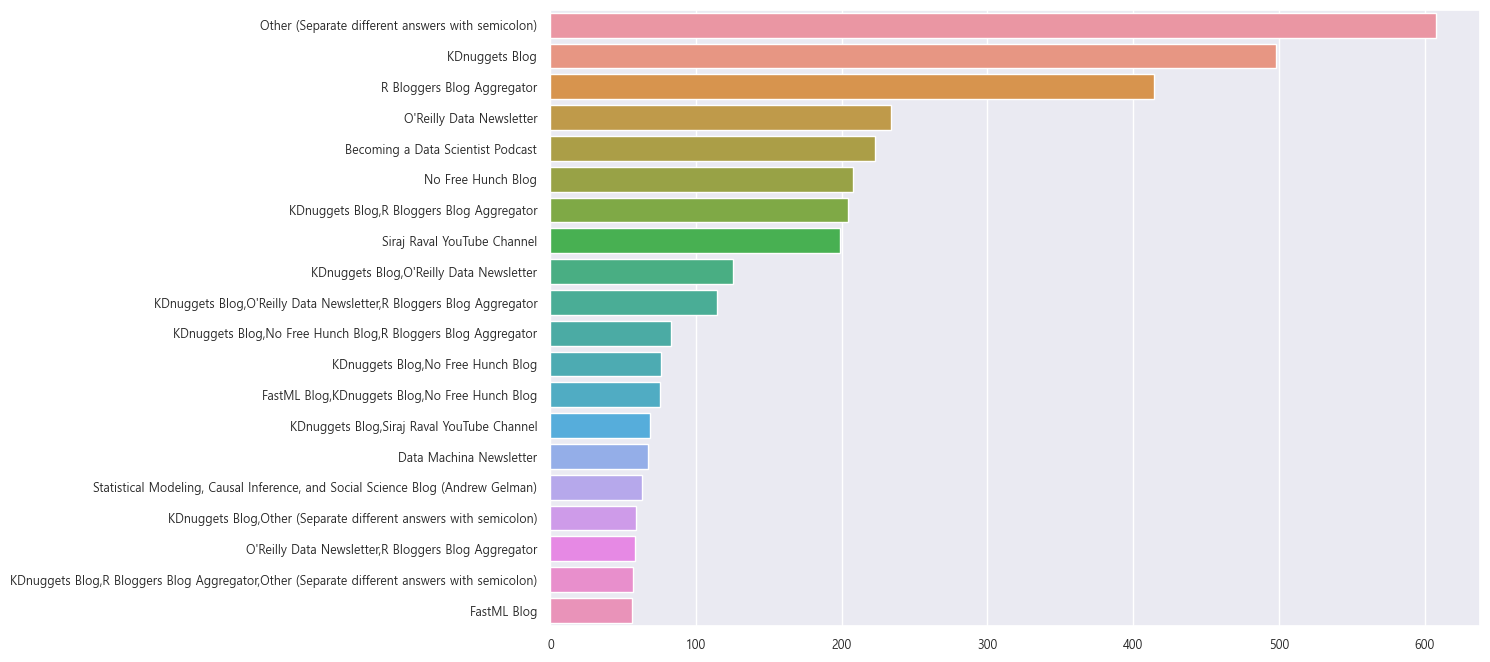

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(x=media_origin_series.values, y=media_origin_series.index)

In [71]:
course_series = mca["CoursePlatformSelect"].str.split(",", expand=True).stack().reset_index(level=1, drop=True)
course_series.head()

2     Coursera
2          edX
7     Coursera
10    Coursera
12    Coursera
dtype: object

In [73]:
course_count_series = course_series.value_counts()
course_count_series

Coursera    1725
Udacity      805
edX          710
DataCamp     638
Other        356
dtype: int64

<Axes: title={'center': 'Most popular course platforms'}>

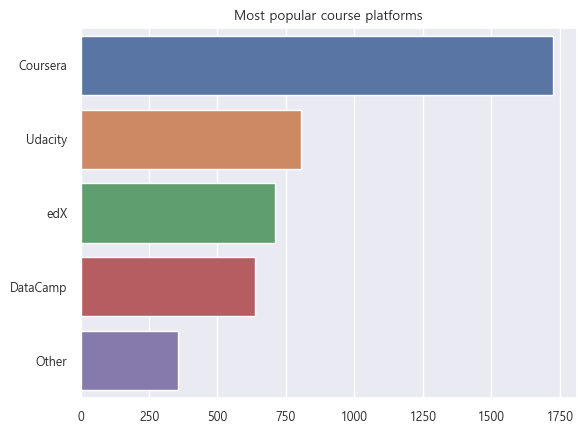

In [76]:
plt.title("Most popular course platforms")
sns.barplot(y=course_count_series.index, x=course_count_series.values)

In [85]:
skill_list = list(mca.columns[mca.columns.str.contains("^JobSkillImportance[^Other]", regex=True)])
skill_list

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [87]:
mca["JobSkillImportanceBigData"].value_counts()

Nice to have    2271
Necessary       1503
Unnecessary      182
Name: JobSkillImportanceBigData, dtype: int64

In [89]:
skill_rate_dict = {}
for skill in skill_list:
    temp = mca[skill].value_counts(normalize=True)
    skill_rate_dict[skill[len("JobSkillImportance"):]] = temp
skill_rate_dict


{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [92]:
skill_rate_df = pd.DataFrame(skill_rate_dict).transpose()
skill_rate_df.head()

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792


<Axes: >

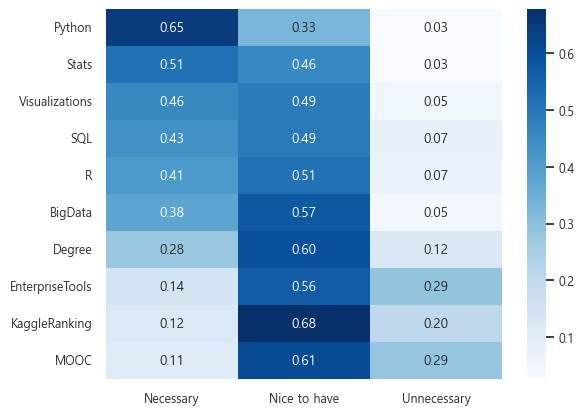

In [95]:
sns.heatmap(skill_rate_df.sort_values("Necessary", ascending=False), annot=True, fmt=".2f", cmap="Blues")

<Axes: >

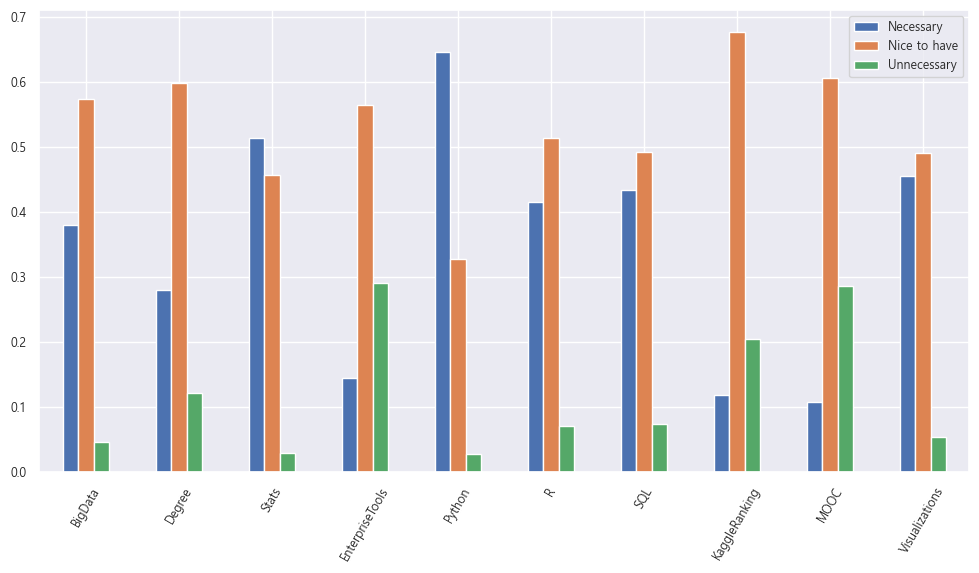

In [100]:
skill_rate_plot = skill_rate_df.plot.bar(figsize=(12, 6))
plt.xticks(rotation=60)
skill_rate_plot

In [114]:
mca[mca["CompensationAmount"].fillna("0").str.contains("^[-]", regex=True)]["CompensationAmount"]

1208       -
2742      -1
3711     -99
5857       -
5939       -
6145       -
8079       -
10365      -
11385      -
Name: CompensationAmount, dtype: object

In [118]:
# mca["CompensationAmount"].replace({"[,-]": ""}, regex=True)
mca.replace({"CompensationAmount": {"[,-]": ""}}, regex=True)["CompensationAmount"]

0           NaN
1           NaN
2           NaN
3        250000
4           NaN
          ...  
16711       NaN
16712       NaN
16713       NaN
16714       NaN
16715       NaN
Name: CompensationAmount, Length: 16716, dtype: object